<a href="https://colab.research.google.com/github/Harshal1618/ImageTothread/blob/master/ImageToThread_v15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

In [0]:
import itertools as it
import ast  # to conert literal to actual e.g. convert '(1,2)' to (1,2)

### Calc Dist of Line Passing Square

In [0]:
def calc_dist(line,grid_square, debug = False):
  if line[0][0] != line[1][0] and line[0][1] != line[1][1]:
    m = (line[1][1] - line[0][1]) / (line[1][0] - line[0][0])
    b = line[0][1] - m*line[0][0]
    
    l_points = []

    x0 = grid_square[0]
    y0 = grid_square[1]
    
    

    y_at_x0 = round(m* x0 +b,2)
    if y_at_x0 >= y0 and y_at_x0 <= y0 + 1:
      l_points.append((x0, y_at_x0))

    y_at_x1 = round(m*(x0 + 1) +b,2)
    if y_at_x1 >= y0 and y_at_x1 <= y0 + 1:
      l_points.append((x0+1, y_at_x1))

    x_at_y0 = round((y0 - b) / m,2)
    if x_at_y0 >= x0 and x_at_y0 <= x0 + 1:
      l_points.append((x_at_y0,y0))

    x_at_y1 = round(((y0 + 1) - b) / m,2)
    if x_at_y1 >= x0 and x_at_y1 <= x0 + 1:
      l_points.append((x_at_y1,y0 + 1))

      
    if debug :
      print('x0 = {} , y0 = {}'.format(x0,y0))
      print('y_at_x0 = {} y_at_x1 = {}'.format(y_at_x0, y_at_x1))
      print('x_at_y0 = {} x_at_y1 = {}'.format(x_at_y0, x_at_y1))
    #print(' y_at_x0={:0.2f} \n y_at_x1={:0.2f} \
    #      \n x_at_y0={:0.2f} \n x_at_y1={:0.2f}'.format(y_at_x0,y_at_x1,
    #                                                    x_at_y0,x_at_y1))

    l_points = list(set(l_points))

    dist = 0
    if len(l_points) > 2 :
      print ('ERROR: More than 2 intersection points computed in square grid {} \
      for line {}. Points = {}'.format(grid_square, line, l_points))
    elif len(l_points) == 2:
      dist = np.sqrt((l_points[0][0] - l_points[1][0])** 2 + (l_points[0][1] - l_points[1][1])** 2)

    #print('List of intersection:{} Distance:{}'.format(l_points,dist))
    
  else:
    dist = 1
    
  return dist

### Find all lines possible

In [0]:
def all_lines(L,H):
  h1  = [(0,i) for i in range(0,H)]
  l1  = [(i,0) for i in range(0,L)]
  h2  = [(H-1,i) for i in range(0,H)]
  l2  = [(i,L-1) for i in range(0,L)]

  l_combi = [ i for i in it.product(h1,l1+h2+l2) ]
  l_combi = l_combi + [ i for i in it.product(l1,h2+l2) ]
  l_combi = l_combi + [ i for i in it.product(h2,l2) ]

  l_combi = list((set(l_combi)))

  l_combi = [e for e in l_combi if e[0] != e[1]]
  
  # Remove all lines that are along the bourdary with length less than length of square
  l_combi = [e for e in l_combi if not((e[0][0] == e[1][0] and abs(e[0][1] - e[1][1]) < H - 1)
                                      or
                                       (e[0][1] == e[1][1] and abs(e[0][0] - e[1][0]) < L - 1))]
  
  l_combi.sort(key= lambda x : x[0])
  
  return l_combi

### Find grid squares for line

In [0]:
def find_grids(L, H, points):
  x_min = min(points[0][0] , points[1][0])
  x_max = max(points[0][0] , points[1][0])
  y_min = min(points[0][1] , points[1][1])
  y_max = max(points[0][1] , points[1][1])

  l_squares = []


  if points[0][0] == points[1][0] and x_min < L -1:
    arr_squares = np.linspace(y_min,y_max -1,y_max- y_min, dtype = int)
    l_squares = [(x_min,i) for i in arr_squares]

  elif points[0][1] == points[1][1] and y_min < H - 1:
    arr_squares = np.linspace(x_min,x_max -1,x_max- x_min, dtype = int)
    l_squares = [(i,y_min) for i in arr_squares]

  elif x_min >= 0 and y_min >= 0 and x_max < L and y_max < H:
    arr_x = np.linspace (x_min, x_max -1, x_max - x_min, dtype = int)
    arr_y = np.linspace (y_min, y_max -1, y_max - y_min, dtype = int)

    l_squares = [(i,j) for i in arr_x for j in arr_y]


  return l_squares

### Calculate All Lines, Squares and Dist

In [48]:
L , H = 11, 11 # There will be L-1 and H-1 pegs respectively. And squares from [0,0] to [9,9]


l_lines = all_lines(L,H) 
l_squares = find_grids(L,H,l_lines[2])

l = [((line, square),[calc_dist(line, square)]) \
     for line in l_lines  \
     for square in find_grids(L,H,line) \
     if calc_dist(line, square) > 0]


df = pd.DataFrame(dict(l)).T
df.index.rename(['line','point'],inplace = True)
df.columns=['dist']
df.head()
 

dist
line              point       
((0, 0), (0, 10)) (0, 0)   1.0
                  (0, 1)   1.0
                  (0, 2)   1.0
                  (0, 3)   1.0
                  (0, 4)   1.0

In [49]:
df = df.reset_index(level=['line','point'])
df.head()

,line,point,dist
0,"((0, 0), (0, 10))","(0, 0)",1.0
1,"((0, 0), (0, 10))","(0, 1)",1.0
2,"((0, 0), (0, 10))","(0, 2)",1.0
3,"((0, 0), (0, 10))","(0, 3)",1.0
4,"((0, 0), (0, 10))","(0, 4)",1.0


In [0]:
df['point1'] =  df['point'].apply(lambda x : ast.literal_eval(str(x)))

In [0]:
df['line1'] =  df['line'].apply(lambda x : ast.literal_eval(str(x)))

In [75]:
df.head()

,line,point,dist,point1,line1
0,"((0, 0), (0, 10))","(0, 0)",1.0,"(0, 0)","((0, 0), (0, 10))"
1,"((0, 0), (0, 10))","(0, 1)",1.0,"(0, 1)","((0, 0), (0, 10))"
2,"((0, 0), (0, 10))","(0, 2)",1.0,"(0, 2)","((0, 0), (0, 10))"
3,"((0, 0), (0, 10))","(0, 3)",1.0,"(0, 3)","((0, 0), (0, 10))"
4,"((0, 0), (0, 10))","(0, 4)",1.0,"(0, 4)","((0, 0), (0, 10))"


### IMPORT IMAGE AND PROCESS IT IN SQUARES

In [7]:
from google.colab import files
image = files.upload()

Saving Obama_v3.jpg to Obama_v3.jpg


In [8]:
!ls

Obama_v3.jpg  sample_data


In [0]:
from PIL import Image
im = Image.open('./Obama_v3.jpg')
arr_im = np.asarray(im)

In [0]:
df_img = pd.DataFrame([0],index=['(x,x)'],columns=['value'])
for i in range(L-1):
  for j in range(H-1):
    area_mean = arr_im[i*10:i*10+10,j*10:j*10+10].mean()
    s_index   = '('+str(i)+', '+str(j)+')'
    df_img = df_img.append(pd.DataFrame([area_mean],index=([s_index]), columns=['value']))

In [0]:
df_img = df_img.reset_index()
df_img = df_img.rename({'index':'point'}, axis = 'columns')

In [0]:
df_img = df_img.drop([0], axis=0)

In [0]:
df_img['point1'] = df_img['point'].apply(lambda x : ast.literal_eval(x))

In [0]:
df_img = df_img[['point1', 'value']]

### MERGE TWO DATASETS

In [0]:
df_result = pd.merge(df, df_img, on='point1')[['line1','point1','dist','value']]

In [89]:
df_result.head()

,line1,point1,dist,value,distval
0,"((0, 0), (0, 10))","(0, 0)",1.000000,254.92,254.920000
1,"((0, 0), (1, 10))","(0, 0)",1.004988,254.92,256.191429
2,"((0, 0), (2, 10))","(0, 0)",1.019804,254.92,259.968411
3,"((0, 0), (3, 10))","(0, 0)",1.044031,254.92,266.144294
4,"((0, 0), (4, 10))","(0, 0)",1.077033,254.92,274.557243


In [0]:
df_result['distval'] = df_result.apply(lambda x : x['dist'] * x['value'], axis=1)

In [0]:
s = df_result.groupby('line1').sum()['distval'].sort_values()

In [101]:
type(s[:10].index[0])

tuple

### Map lines

In [0]:
import matplotlib.pyplot as plt

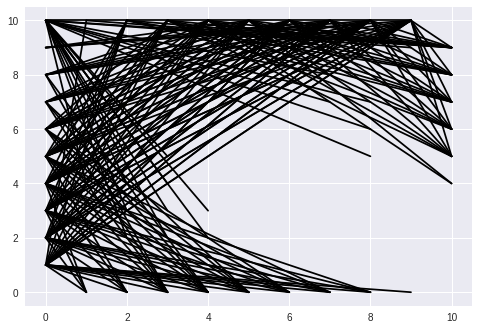

In [119]:
no_of_lines = 200
s_lines = s[:no_of_lines].index

for i in range(no_of_lines):
  p1 = list(s_lines[i][0])
  #print('P1 ={}'.format(p1))
  #p1[1] = H - 1 - p1[1]
  #print('Changed P1 = {}'.format(p1))
  
  p2 = list(s_lines[i][1])
  #print('P2 ={}'.format(p2))
  #p2[1] = H - 1 - p2[1]
  #print('Changed P2 = {}'.format(p2))
  
  
  plt.plot(p1,p2,'black')


In [113]:
p1

(10, 9)

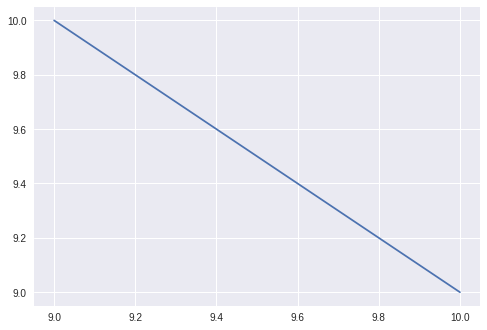

In [108]:
plt.plot(p1,p2)